
# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.


# Projet final : Débordement d'égouts
### Équipe 17 : Elie Rouphael, Souhaila Mellouk, Thien-Kim Luu, Mourad Younes, Lynn Chararbsissy 
Remis le vendredi 20 décembre



# Table des matières


-  [1. Introduction](#1.-Introduction)




## 1. Introduction

Le but de ce projet consiste à déterminer les caractéristiques des événements pluvieux susceptibles de générer des surverses sur le territoire de la Ville de Montréal. Il s'agit d'établir le lien entre les événements pluvieux et les surverses dues aux précipitations. On suppose que lorsqu'il n'y a pas de raison pour la surverse, il s'agit d'une surverse causée par les précipitations. Puisque nous nous intéresserons uniquement aux surverses occasionnées par les précipitations liquides, nous ne considérons que les mois de mai à octobre inclusivement.

La description du projet est disponible à l'adresse suivante :
https://www.kaggle.com/t/a238b752c33a41d9803c2cdde6bfc929

In [308]:
using Distributions

In [309]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


In [310]:
using CSV, DataFrames, Statistics, Dates, Gadfly, Missings

# Chargement des données et nettoyage préliminaire

## Chargement des surverses

In [311]:
data = CSV.read("data/surverses.csv",missingstring="-99999")
first(data,5)

5×4 DataFrame
│ Row │ NO_OUVRAGE │ DATE       │ SURVERSE │ RAISON  │
│     │ String     │ Date       │ Int64⍰   │ String⍰ │
├─────┼────────────┼────────────┼──────────┼─────────┤
│ 1   │ 0642-01D   │ 2013-05-01 │ 0        │ missing │
│ 2   │ 0642-01D   │ 2013-05-02 │ 0        │ missing │
│ 3   │ 0642-01D   │ 2013-05-03 │ 0        │ missing │
│ 4   │ 0642-01D   │ 2013-05-04 │ 0        │ missing │
│ 5   │ 0642-01D   │ 2013-05-05 │ 0        │ missing │

## Nettoyage des données sur les surverses

#### Extraction des surverses pour les mois de mai à octobre inclusivement

In [312]:
data = filter(row -> month(row.DATE) > 4, data) 
data = filter(row -> month(row.DATE) < 11, data) 
first(data,5)

5×4 DataFrame
│ Row │ NO_OUVRAGE │ DATE       │ SURVERSE │ RAISON  │
│     │ String     │ Date       │ Int64⍰   │ String⍰ │
├─────┼────────────┼────────────┼──────────┼─────────┤
│ 1   │ 0642-01D   │ 2013-05-01 │ 0        │ missing │
│ 2   │ 0642-01D   │ 2013-05-02 │ 0        │ missing │
│ 3   │ 0642-01D   │ 2013-05-03 │ 0        │ missing │
│ 4   │ 0642-01D   │ 2013-05-04 │ 0        │ missing │
│ 5   │ 0642-01D   │ 2013-05-05 │ 0        │ missing │

#### Remplacement des valeurs *missing* dans la colonne :RAISON par "Inconnue"

In [313]:
raison = coalesce.(data[:,:RAISON],"Inconnue")
data[!,:RAISON] = raison
first(data,5)

5×4 DataFrame
│ Row │ NO_OUVRAGE │ DATE       │ SURVERSE │ RAISON   │
│     │ String     │ Date       │ Int64⍰   │ String   │
├─────┼────────────┼────────────┼──────────┼──────────┤
│ 1   │ 0642-01D   │ 2013-05-01 │ 0        │ Inconnue │
│ 2   │ 0642-01D   │ 2013-05-02 │ 0        │ Inconnue │
│ 3   │ 0642-01D   │ 2013-05-03 │ 0        │ Inconnue │
│ 4   │ 0642-01D   │ 2013-05-04 │ 0        │ Inconnue │
│ 5   │ 0642-01D   │ 2013-05-05 │ 0        │ Inconnue │

#### Exlusion des surverses coccasionnées par d'autres facteurs que les précipitations liquides

Ces facteurs correspondent à : 
- la fonte de neige (F), 
- les travaux planifiés et entretien (TPL)
- urgence (U)
- autre (AUT)

In [314]:
data = filter(row -> row.RAISON ∈ ["P","Inconnue","TS"], data) 
select!(data, [:NO_OUVRAGE, :DATE, :SURVERSE])

176667×3 DataFrame
│ Row    │ NO_OUVRAGE │ DATE       │ SURVERSE │
│        │ String     │ Date       │ Int64⍰   │
├────────┼────────────┼────────────┼──────────┤
│ 1      │ 0642-01D   │ 2013-05-01 │ 0        │
│ 2      │ 0642-01D   │ 2013-05-02 │ 0        │
│ 3      │ 0642-01D   │ 2013-05-03 │ 0        │
│ 4      │ 0642-01D   │ 2013-05-04 │ 0        │
│ 5      │ 0642-01D   │ 2013-05-05 │ 0        │
│ 6      │ 0642-01D   │ 2013-05-06 │ 0        │
│ 7      │ 0642-01D   │ 2013-05-07 │ 0        │
│ 8      │ 0642-01D   │ 2013-05-08 │ 0        │
│ 9      │ 0642-01D   │ 2013-05-09 │ 0        │
│ 10     │ 0642-01D   │ 2013-05-10 │ 0        │
⋮
│ 176657 │ 4560-02D   │ 2018-10-21 │ missing  │
│ 176658 │ 4560-02D   │ 2018-10-22 │ missing  │
│ 176659 │ 4560-02D   │ 2018-10-23 │ missing  │
│ 176660 │ 4560-02D   │ 2018-10-24 │ missing  │
│ 176661 │ 4560-02D   │ 2018-10-25 │ missing  │
│ 176662 │ 4560-02D   │ 2018-10-26 │ missing  │
│ 176663 │ 4560-02D   │ 2018-10-27 │ missing  │
│ 176664 │ 4560-02D   │ 2018-10-28 │ missing  │
│ 176665 │ 4560-02D   │ 2018-10-29 │ missing  │
│ 176666 │ 4560-02D   │ 2018-10-30 │ missing  │
│ 176667 │ 4560-02D   │ 2018-10-31 │ missing  │

#### Exclusion des lignes où :SURVERSE est manquante

In [315]:
surverse_df = dropmissing(data, disallowmissing=true);

In [316]:
n₁ = sum(x->x==1, surverse_df[:SURVERSE], dims=1) 
n₀ = sum(x->x==0, surverse_df[:SURVERSE], dims=1) 
n = n₀ + n₁

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[316]:1
└ @ Core In[316]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[316]:2
└ @ Core In[316]:2


1-element Array{Int64,1}:
 161098

In [317]:
filtervals = ["3260-01D"; "3350-07D"; "4240-01D"; "4350-01D"; "4380-01D"]
surverse_df1 = filter(row-> row.NO_OUVRAGE == filtervals[1], surverse_df)
surverse_df2 = filter(row-> row.NO_OUVRAGE == filtervals[2], surverse_df)
surverse_df3 = filter(row-> row.NO_OUVRAGE == filtervals[3], surverse_df)
surverse_df4 = filter(row-> row.NO_OUVRAGE == filtervals[4], surverse_df)
surverse_df5 = filter(row-> row.NO_OUVRAGE == filtervals[5], surverse_df);

In [318]:
#### on prend pour chaque ouvrage le nombre de fois ou il a eu surver et non
n₁ = Int64[]
n₀  = Int64[]
n  = Int64[]

0-element Array{Int64,1}

In [319]:

function findSurverseCount(surverse_df1)
    n1₁ = sum(x->x==1, surverse_df1, dims=1) 
    push!(n₁, n1₁[1])
    n1₀ = sum(x->x==0, surverse_df1, dims=1)  
    push!(n₀, n1₀[1])
    n1= n1₁[1] + n1₀[1]
    push!(n, n1)
end

findSurverseCount (generic function with 1 method)

In [320]:
findSurverseCount(surverse_df1[:SURVERSE]);
findSurverseCount(surverse_df2[:SURVERSE]);
findSurverseCount(surverse_df3[:SURVERSE]);
findSurverseCount(surverse_df4[:SURVERSE]);
findSurverseCount(surverse_df5[:SURVERSE]);

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[320]:1
└ @ Core In[320]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[320]:2
└ @ Core In[320]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[320]:3
└ @ Core In[320]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[320]:4
└ @ Core In[320]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[320]:5
└ @ Core In[320]:5


## Chargement des précipitations

In [321]:
databefore = CSV.read("data/precipitations.csv",missingstring="-99999")
rename!(databefore, Symbol("St-Hubert")=>:StHubert)
first(databefore,5)

5×7 DataFrame. Omitted printing of 1 columns
│ Row │ date       │ heure │ McTavish │ Bellevue │ Assomption │ Trudeau │
│     │ Date       │ Int64 │ Int64⍰   │ Int64⍰   │ Int64⍰     │ Int64⍰  │
├─────┼────────────┼───────┼──────────┼──────────┼────────────┼─────────┤
│ 1   │ 2013-01-01 │ 0     │ 0        │ 0        │ 0          │ 0       │
│ 2   │ 2013-01-01 │ 1     │ 0        │ 0        │ 0          │ 0       │
│ 3   │ 2013-01-01 │ 2     │ 0        │ 0        │ 0          │ 0       │
│ 4   │ 2013-01-01 │ 3     │ 0        │ 0        │ 0          │ 0       │
│ 5   │ 2013-01-01 │ 4     │ 0        │ 0        │ 0          │ 0       │

In [322]:
data = CSV.read("data/precipitations.csv",missingstring="-99999")
rename!(data, Symbol("St-Hubert")=>:StHubert)
first(data,5)

5×7 DataFrame. Omitted printing of 1 columns
│ Row │ date       │ heure │ McTavish │ Bellevue │ Assomption │ Trudeau │
│     │ Date       │ Int64 │ Int64⍰   │ Int64⍰   │ Int64⍰     │ Int64⍰  │
├─────┼────────────┼───────┼──────────┼──────────┼────────────┼─────────┤
│ 1   │ 2013-01-01 │ 0     │ 0        │ 0        │ 0          │ 0       │
│ 2   │ 2013-01-01 │ 1     │ 0        │ 0        │ 0          │ 0       │
│ 3   │ 2013-01-01 │ 2     │ 0        │ 0        │ 0          │ 0       │
│ 4   │ 2013-01-01 │ 3     │ 0        │ 0        │ 0          │ 0       │
│ 5   │ 2013-01-01 │ 4     │ 0        │ 0        │ 0          │ 0       │

## Nettoyage des données sur les précipitations

#### Extraction des précipitations des mois de mai à octobre inclusivement

Nous avons extracté dans "data" toutes les données venant du moi de mai jusqu'au moi d'octobre. Nous avons aussi crée une
variable "databefore", qui va surtout servir pour les jours ou il n'a pas plu beaucoup mais il y'a eu quand meme une surverse. Nous avons choisis d'extracter à partir du mois d'avril, puisqu'il existe quand même la possibilité que le premier mai, il y'a 
surverse, même s'il n'a pas plu, et dans ce cas il faudra vérifier le jour précédent, soit le 30 Avril.

In [323]:
data = filter(row -> month(row.date) > 4, data) 
data = filter(row -> month(row.date) < 11, data) 
databefore = filter(row -> month(row.date) > 3, databefore) b
databefore = filter(row -> month(row.date) < 11, databefore) 
databefore = filter(row -> row.heure >= 19, databefore) ;

LoadError: syntax: extra token "b" after end of expression

fillWithMean() va principalement s'occuper à remplacer tous les missing values par la moyenne des autres colonnes de 
précipitation. Dans le cas ou toutes les valeurs d'une date spécifique sont égales a missing, elle va les remplacer 
par un zéro.

In [324]:
function fillWithMean(table)
    
    for j=1:size(table,1)
        means = 0
        sum = 0
        names = names(table)
        for col in names
            if col != alo[1]
                if !names(table[j, col]) 
                    sum = sum +1
                    means = means + table[j, col]
                end
            end
        end
        if sum != 0
            means = means / sum
        end
        for col in names
            if ismissing(table[j, col]) && col != names[1]
                table[j, col] = floor(means)
            end
        end
    end
end

fillWithMean (generic function with 1 method)

In [325]:
fillWithMean(data)
fillWithMean(databefore)

UndefVarError: UndefVarError: names not defined

In [326]:
pcp_sum = by(data, :date,  McTavish = :McTavish=>sum, Bellevue = :Bellevue=>sum, 
   Assomption = :Assomption=>sum, Trudeau = :Trudeau=>sum, StHubert = :StHubert=>sum);
first(pcp_sum ,5);

In [327]:
pcp_max = by(data, :date,  McTavish = :McTavish=>maximum, Bellevue = :Bellevue=>maximum, 
   Assomption = :Assomption=>maximum, Trudeau = :Trudeau=>maximum, StHubert = :StHubert=>maximum)
first(pcp_max,5);

In [328]:
pcp_sumBefore = by(databefore, :date,  McTavish = :McTavish=>sum, Bellevue = :Bellevue=>sum, 
   Assomption = :Assomption=>sum, Trudeau = :Trudeau=>sum, StHubert = :StHubert=>sum);
first(pcp_sum ,5);

In [329]:
pcp_maxBefore = by(databefore, :date,  McTavish = :McTavish=>maximum, Bellevue = :Bellevue=>maximum, 
   Assomption = :Assomption=>maximum, Trudeau = :Trudeau=>maximum, StHubert = :StHubert=>maximum)
first(pcp_max,5);

# Analyse exploratoire

Cette section consitue une analyse exploratoire superficielle permettant de voir s'il existe un lien entre les précipitations et les surverses.

Prenons arbitrairement l'ouvrage de débordement près du Bota-Bota (4350-01D). La station météorologique la plus proche est McTavish. Prenons deux variables explicatives simple :
- la somme journalière des précipitations
- le taux horaire maximum journalier de précipitations

#### Calcul de la quantité journalière de précipitations pour chacune des stations météorologiques

**findMeanOfAllColumn** mets dans une colonne la moyenne de toutes les colonnes de la table passée en paramètres

@params une table 

@return une table

In [330]:
function findMeanOfAllColumn(table)
    p = DataFrame(name =Float64[])
    for j=1:size(table,1)
        alo = names(table)
        means = 0
        sum = 0
        for col in alo
            if col != alo[1]
                if !ismissing(table[j, col]) 
                    sum = sum +1
                    means = means + table[j, col]
                end
            end
        end
        push!(p, means/sum)
    end
    table = DataFrame(date = table[:date]; name =p[:name]);
    return table
end

findMeanOfAllColumn (generic function with 1 method)

#### Inclusion dans un dataframe de ces deux variables explicatives potentielles

**Tableau 1. Distances entre les stations pluviométriques et les lieux des ouvrages**

|  | McTavish | Ste-Anne-de-Bellevue | Montréal/Pierre Elliott Trudeau Intl | Montréal/St-Hubert | L’Assomption |
|----------|----------|----------|----------|----------|----------|
| Rivière-des-Prairies | 16,56 km | 37,31 km | 24,05 km | 19,91 km | 20,98 km 
| Ahunstic | 10,00 km | 23,21 km | 9,69 km | 21,68 km | 35,44 km |
| Pointe-aux-Trembles | 17,67 km | 42,82 km | 28,37 km | 15,68 km | 18.19 km |
| Vieux-Montréal | 2,16 km | 30,66 km | 15,18 km | 10,74 km | 35,60 km |
| Verdun | 4,29 km | 29,58 km | 14,45 km | 12,10 km | 38,95 km |


Ces distances ont été trouvé à l'aide de Google Map.

**calculateMeanUsingDistance** mets dans une table la moyenne des surverses des stations les plus proches en fonction des ouvragres

@params une table (ex: pcp_sum, pcp_max ...) 

@return une table

In [332]:
function calculateMeanUsingDistance(table)
    p = DataFrame(date = table[:, :date],McTavish =table[:, :McTavish],StHubert=table[:, :StHubert], Assomption=table[:, :Assomption]);
    S4240 = findMeanOfAllColumn(p);
    p = DataFrame(date = table[:, :date],McTavish =table[:, :McTavish],StHubert=table[:, :StHubert], Assomption=table[:, :Assomption]);
    S3260 = findMeanOfAllColumn(p);
    p = DataFrame(date = table[:, :date],McTavish =table[:, :McTavish]);
    S4350_4380 = findMeanOfAllColumn(p);
    p = DataFrame(date = table[:, :date],McTavish =table[:, :McTavish],StHubert=table[:, :Trudeau]);
    S3350 = findMeanOfAllColumn(p);
    
    return DataFrame(date = table[:, :date],S4240=S4240[:name], S3260=S3260[:name],S4350_4380=S4350_4380[:name],S3350=S3350[:name] );
end

calculateMeanUsingDistance (generic function with 1 method)

In [333]:
pcp_sum = calculateMeanUsingDistance(pcp_sum)
pcp_max = calculateMeanUsingDistance(pcp_max)
pcp_sumBefore = calculateMeanUsingDistance(pcp_sumBefore)
pcp_maxBefore = calculateMeanUsingDistance(pcp_maxBefore)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = findMeanOfAllColumn(::DataFrame) at In[330]:17
└ @ Main .\In[330]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = findMeanOfAllColumn(::DataFrame) at In[330]:17
└ @ Main .\In[330]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = calculateMeanUsingDistance(::DataFrame) at In[332]:11
└ @ Main .\In[332]:11
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = calculateMeanUsingDistance(::DataFrame) at In[332]:11
└ @ Main .\In[332]:11
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = calculateMeanUsingDistance(::DataFrame) at In[332]:11
└ @ Main .\In[332]:11
┌ Warning: `getindex(df::DataFrame, col_ind::Colu

2556×5 DataFrame
│ Row  │ date       │ S4240   │ S3260   │ S4350_4380 │ S3350   │
│      │ Date       │ Float64 │ Float64 │ Float64    │ Float64 │
├──────┼────────────┼─────────┼─────────┼────────────┼─────────┤
│ 1    │ 2013-01-01 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
│ 2    │ 2013-01-02 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
│ 3    │ 2013-01-03 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
│ 4    │ 2013-01-04 │ 16.5    │ 16.5    │ 13.0       │ 9.0     │
│ 5    │ 2013-01-05 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
│ 6    │ 2013-01-06 │ 11.0    │ 11.0    │ 12.0       │ 8.5     │
│ 7    │ 2013-01-07 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
│ 8    │ 2013-01-08 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
│ 9    │ 2013-01-09 │ 16.0    │ 16.0    │ 12.0       │ 6.0     │
│ 10   │ 2013-01-10 │ 0.0     │ 0.0     │ 0.0        │ 0.0     │
⋮
│ 2546 │ 2019-12-21 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2547 │ 2019-12-22 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2548 │ 2019-12-23 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2549 │ 2019-12-24 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2550 │ 2019-12-25 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2551 │ 2019-12-26 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2552 │ 2019-12-27 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2553 │ 2019-12-28 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2554 │ 2019-12-29 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2555 │ 2019-12-30 │ NaN     │ NaN     │ NaN        │ NaN     │
│ 2556 │ 2019-12-31 │ NaN     │ NaN     │ NaN        │ NaN     │

In [334]:
filtervals = ["3260-01D"; "3350-07D"; "4240-01D"; "4350-01D"; "4380-01D"];
table = ["S3260", "S3350","S4240","S4350_4380", "S4350_4380"];

On cherche à récupérer les valeurs de 8 tableaux pour les surverses telles que pour cela il faut specifier que c'est un tableau qui contient la moyenne et la variance pour chaque ouvrage dans l'ordre suivant : 

filtervals = ["3260-01D"; "3350-07D"; "4240-01D"; "4350-01D"; "4380-01D"];

**moyenneSumSurverses** : contient la moyenne des sommes des précipitations par jour où il y a eu une surverse. 

**moyenneMaxSurverses** : contient le maximum de précipitations par jour où il y a eu une surverse.

**varianceSumSurverses** : contient la variance des sommes des précipitations par jour où il y a eu une surverse.

**varianceMaxSurverses** : contient la variance des précipitations par jour où il y a eu une surverse.

**moyenneSumNonSurverses** : contient la moyenne des sommes des précipitations par jour où il n’y a pas eu une surverse. 

**moyenneMaxNonSurverses** : contient le maximum de précipitations par jour où il n’y a pas eu une surverse.

**varianceSumNonSurverses** : contient la variance des sommes des précipitations par jour où il n’y a pas eu une surverse.

**varianceMaxNonSurverses** : contient la variance des précipitations des jours où il n’y a pas eu une surverse.


In [335]:
moyenneSumSurverses = Float64[]
moyenneMaxSurverses = Float64[]
varianceSumSurverses = Float64[];
varianceMaxSurverses = Float64[];

moyenneSumNonSurverses = Float64[]
moyenneMaxNonSurverses = Float64[]
varianceSumNonSurverses = Float64[]
varianceMaxNonSurverses = Float64[]
for j=1:size(filtervals,1)
    dfSurverse = filter(row -> row.NO_OUVRAGE == filtervals[j]  && row.SURVERSE ==1, surverse_df)
    dfNonSurverse = filter(row -> row.NO_OUVRAGE == filtervals[j]  && row.SURVERSE ==0, surverse_df)


    moyenneSumSurverse = 0;
    moyenneMaxSurverse = 0;
    for i=1:size(dfSurverse,1)

        ind = findfirst(pcp_sum[:,:date] .== dfSurverse[i,:DATE])
        moyenneSumSurverse += pcp_sum[ind,Symbol(table[j])]
        
        indmax = findfirst(pcp_max[:,:date] .== dfSurverse[i,:DATE])
        moyenneMaxSurverse +=  pcp_max[indmax,Symbol(table[j])]
    end
    moyenneSumSurverse = moyenneSumSurverse / size(dfSurverse,1)
    push!(moyenneSumSurverses, moyenneSumSurverse)
    moyenneMaxSurverse = moyenneMaxSurverse / size(dfSurverse,1)
    push!(moyenneMaxSurverses, moyenneMaxSurverse)
    
    moyenneSumNonSurverse = 0;
    moyenneMaxNonSurverse = 0;
    for i=1:size(dfNonSurverse,1)

        ind = findfirst(pcp_sum[:,:date] .== dfNonSurverse[i,:DATE])
        moyenneSumNonSurverse = moyenneSumNonSurverse +  pcp_sum[ind,Symbol(table[j])]
        
        ind = findfirst(pcp_max[:,:date] .== dfNonSurverse[i,:DATE])
        moyenneMaxNonSurverse = moyenneMaxNonSurverse +  pcp_max[ind,Symbol(table[j])]
    end
    moyenneSumNonSurverse /= size(dfNonSurverse,1)
    push!(moyenneSumNonSurverses, moyenneSumNonSurverse)
    moyenneMaxNonSurverse /= size(dfNonSurverse,1)
    push!(moyenneMaxNonSurverses, moyenneMaxNonSurverse)
    
    
    
    #### maintenant la variance
    varianceSumSurverse = 0;
    varianceMaxSurverse = 0;
    for i=1:size(dfSurverse,1)

        ind = findfirst(pcp_sum[:,:date] .== dfSurverse[i,:DATE])
        varianceSumSurverse += (pcp_sum[ind,Symbol(table[j])]-moyenneSumSurverse)^2

        ind = findfirst(pcp_max[:,:date] .== dfSurverse[i,:DATE])
        varianceMaxSurverse += (pcp_max[ind,Symbol(table[j])]-moyenneMaxSurverse)^2
        
       
    end
    varianceSumSurverse /= size(dfSurverse,1)
    push!(varianceSumSurverses, varianceSumSurverse)
    varianceMaxSurverse /= size(dfSurverse,1)
    push!(varianceMaxSurverses, varianceMaxSurverse)

    
    varianceSumNonSurverse = 0;
    varianceMaxNonSurverse = 0;
    for i=1:size(dfNonSurverse,1)

        ind = findfirst(pcp_sum[:,:date] .== dfNonSurverse[i,:DATE])
        varianceSumNonSurverse += (pcp_sum[ind,Symbol(table[j])]-moyenneSumNonSurverse)^2

        ind = findfirst(pcp_max[:,:date] .== dfNonSurverse[i,:DATE])
        varianceMaxNonSurverse += (pcp_max[ind,Symbol(table[j])]-moyenneMaxNonSurverse)^2
    
    end
    varianceSumNonSurverse /= size(dfNonSurverse,1)
    push!(varianceSumNonSurverses, varianceSumNonSurverse)
    varianceMaxNonSurverse /= size(dfNonSurverse,1)
    push!(varianceMaxNonSurverses, varianceMaxNonSurverse) 
end


# Création du fichier de prédictions pour soumettre sur Kaggle

Dans ce cas-ci, nous prédirons une surverse avec une probabilité de 1/2 sans considérer aucune variable explicative.

In [336]:

testfile = CSV.read("data/test.csv")
first(testfile,5)

5×2 DataFrame
│ Row │ NO_OUVRAGE │ DATE       │
│     │ String     │ Date       │
├─────┼────────────┼────────────┤
│ 1   │ 3260-01D   │ 2019-05-02 │
│ 2   │ 3260-01D   │ 2019-05-09 │
│ 3   │ 3260-01D   │ 2019-05-10 │
│ 4   │ 3260-01D   │ 2019-05-15 │
│ 5   │ 3260-01D   │ 2019-05-20 │

## Idée rejetée
Nous avons calculer la moyenne et la variance, pour chaque ouvrage, en considerant la somme et le maximum de la journée précedante. Et cela en prenant en consideration toute la journee d'avant ou juste tous ce qui est apres 18h00 ou te ce qui est apres 21h. En faisant les calculs, et a remetant sur kaggle nous avons remarqué que le score a diminiué un peu. Cela est probablement du a la  dependance entre les variables. Puisuqe en naive bayes, nous mettonz l'hypothese de dependance conditionnelle entre les variables, mais dans ce cas la dependance ne pouvait pas etres ignoré

In [337]:

#indx = findfirst(pcp_sumBefore[:,:date] .== (testfile[i,:DATE]-Dates.Day(1)))
# sumBefore= pcp_sumBefore[indx,Symbol(table[indproba])]

#indx = findfirst(pcp_maxBefore[:,:date] .== (testfile[i,:DATE]-Dates.Day(1)))
#maxBefore = pcp_maxBefore[indx,Symbol(table[indproba])]
#     
#pSumBeforeSurverses = (1/sqrt(2*π*varianceSumBeforeSurverses[indproba])) - (1/2)*(((sumBefore-moyenneSumBeforeSurverses[indproba])^2)/varianceSumBeforeSurverses[indproba])
#pSumBeforeSurverses = (1/sqrt(2*π*varianceSumBeforeSurverses[indproba]))*exp(- (1/2)*(((sumBefore-moyenneSumBeforeSurverses[indproba])^2)/varianceSumBeforeSurverses[indproba]))

#pMaxBeforeSurverses = (1/sqrt(2*π*varianceMaxBeforeSurverses[indproba]))*exp(- (1/2)*(((maxBefore-moyenneMaxBeforeSurverses[indproba])^2)/varianceMaxBeforeSurverses[indproba]))
  

#pMaxBeforeSurverses = (1/sqrt(2*π*varianceMaxBeforeSurverses[indproba])) - (1/2)*(((maxBefore-moyenneMaxBeforeSurverses[indproba])^2)/varianceMaxBeforeSurverses[indproba])
     

On estime à l’aide du modèle gaussien et de la formule vu en cours les probabilités pSumSurverses et pMaxSurverses. Également, de la même manière pSumNoSurverses et pMaxNoSurverses.

$ f_{(Y|\mu, \sigma^2)}(y) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp{-\frac{1}{2\sigma^2}(y-\mu)^2} $

**psurverse**: probabilité d’avoir une surverse

**pSumSurverses**: probabilité d’obtenir cette somme des précipitations par jour sachant qu’il y a eu une surverse

**pMaxSurverses**: probabilité d’obtenir cette valeur maximale pour les précipations par jour sachant qu’il y a eu une surverse

**Pnonsurverse**: probabilité qu’il n’y ait pas de surverse

**pSumNonSurverses**: probabilité d’obtenir cette somme des précipitations par jour sachant qu’il n’y a pas eu de surverse

**pMaxNonSurverses**: probabilité d’obtenir cette valeur maximale pour les précipations par jour sachant qu’il n’y a pas eu de surverse

Par la suite, on multiplie pSumSurverses par pMaxSurverses et pSumNoSurverses par pMaxNoSurverses, qu’on assigne respectivement aux variables pxSsurverse pxNoSsurverse.

**pxSsurverse**: probabilité d’obtenir la somme des précipitations en étude ainsi que la valeur maximale de précipitations en question sachant qu’il y a eu une surverse. 


**pxSnonsurverse**: probabilité d’obtenir la somme des précipitations en étude ainsi que cette valeur maximale de précipitations en question sachant qu’il n’y a pas eu de surverse.

On calcule finalement la probabilité de surverse ‘psurverse’ grâce au théorème de Bayes.

$ P(E_{i}|A) = \frac{P(A|E_{i})P(E_{i})}{P(A)} 
= \frac{P(A|E_{i})P(E_{i})}{\sum \limits _{j=1}^{n}P(A|E_{j})P(E_{j})}$

On a donc que $ pSurverse = \frac{(pxSsurverse * Psurverse)}{(pxSsurverse * Psurverse + pxSnonsurverse*Pnonsurverse)} $


On garde cette valeur si cette dernière est supérieure à 0,5 sinon elle est rejetée.


In [338]:
surverse = Int[]
for i=1:size(testfile,1)
    indproba = findfirst(filtervals[:] .== testfile[i,:NO_OUVRAGE])
    ind = findfirst(pcp_sum[:,:date] .== testfile[i,:DATE])
    sum = pcp_sum[ind,Symbol(table[indproba])]
    ind = findfirst(pcp_max[:,:date] .== testfile[i,:DATE])
    max = pcp_max[ind,Symbol(table[indproba])]
      
    indx = findfirst(pcp_sumBefore[:,:date] .== (testfile[i,:DATE]-Dates.Day(1)))
    sumBefore= pcp_sumBefore[indx,Symbol(table[indproba])]

    indx = findfirst(pcp_maxBefore[:,:date] .== (testfile[i,:DATE]-Dates.Day(1)))
    maxBefore = pcp_maxBefore[indx,Symbol(table[indproba])]
    Psurverse = n₁[indproba]/n[indproba]

    pSumSurverses = (1/sqrt(2*π*varianceSumSurverses[indproba])) *exp(- (1/2)*(((sum-moyenneSumSurverses[indproba])^2)/varianceSumSurverses[indproba]))

    pMaxSurverses = (1/sqrt(2*π*varianceMaxSurverses[indproba]))*exp(- (1/2)*(((max-moyenneMaxSurverses[indproba])^2)/varianceMaxSurverses[indproba]))
    
    Pnonsurverse = n₀[indproba]/n[indproba]

    pSumNonSurverses = (1/sqrt(2*π*varianceSumNonSurverses[indproba]))*exp(- (1/2)*(((sum-moyenneSumNonSurverses[indproba])^2)/varianceSumNonSurverses[indproba]))
    pMaxNonSurverses = (1/sqrt(2*π*varianceMaxNonSurverses[indproba]))*exp(- (1/2)*(((max-moyenneMaxNonSurverses[indproba])^2)/varianceMaxNonSurverses[indproba]))
  
    pxSsurverse = pSumSurverses * pMaxSurverses
    
    pxSnonsurverse = pSumNonSurverses * pMaxNonSurverses
    
  
    psurverse = (pxSsurverse * Psurverse)/(pxSsurverse * Psurverse + pxSnonsurverse*Pnonsurverse)
    isSurverse = psurverse>0.5
    
    #if isSurverse == 1
        push!(surverse, isSurverse);

end
# Pour chacune des lignes du fichier test, comportant un ouvrage et une date, une prédiction est requise.
# Dans ce cas-ci, utilisons une prédiction les plus naîve. 
# On prédit avec une chance sur deux qu'il y ait surverse, sans utiliser de variables explicatives



# Création du fichier sampleSubmission.csv pour soumettre sur Kaggle
ID = testfile[:,:NO_OUVRAGE].*"_".*string.(testfile[:,:DATE])
sampleSubmission = DataFrame(ID = ID, Surverse=surverse)
CSV.write("result.csv",sampleSubmission)

# Vous pouvez par la suite déposer le fichier sampleSubmission.csv sur Kaggle.


"result.csv"

On trace les schémas qui représentes les surverses et non surverses par rapport a la somme et au maximum. On remarque que les données ne semblent pas linéairement séparables. Ceci explique pourquoi notre modèle ne performe pas très bien. Nous suggérons d’utiliser l’algorithme SVM, ou les arbres de décision. 

In [339]:
ps =[]
for j=1:size(filtervals,1)
    dfSurverse = filter(row -> row.NO_OUVRAGE == filtervals[j] , surverse_df)
    sums = DataFrame(SUM =Float64[])
    maxs = DataFrame(MAX =Float64[])
    surverse = DataFrame(surverse =Int64[])
    for i=1:size(dfSurverse,1)
        ind = findfirst(pcp_sum[:,:date] .== dfSurverse[i,:DATE])
        push!(sums, pcp_sum[ind,Symbol(table[j])])

        indmax = findfirst(pcp_max[:,:date] .== dfSurverse[i,:DATE])
        push!(maxs, pcp_max[indmax, Symbol(table[j])])

        push!(surverse, dfSurverse[i,:SURVERSE])
    end
    
    test = DataFrame(SUM = sums[:SUM], MAX =maxs[:MAX],SURVERSE= surverse[:surverse]);
    p1 = plot(test, x="SUM", y="MAX",color="SURVERSE",  Geom.point)
    push!(ps, p1)
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[339]:17
└ @ Core In[339]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[339]:17
└ @ Core In[339]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[339]:17
└ @ Core In[339]:17


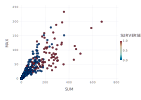

In [340]:
ps[1]

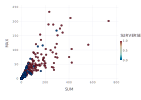

In [341]:
ps[2]

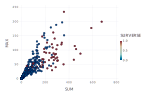

In [342]:
ps[3]

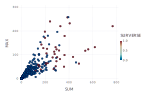

In [343]:
ps[4]

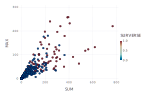

In [344]:
ps[5]